# [Transformer Pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines)

## [주요 파라미터](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline)

- `task`: The task defining which pipeline will be returned.
  - "text-generation", "audio-classification", "image-to-text" 등
- `model`: The model that will be used by the pipeline to make predictions.
- `config(optional)`: The configuration that will be used by the pipeline to instantiate the model.
- `tokenizer(optional)`: The tokenizer that will be used by the pipeline to encode data for the model.

## [Pipeline 내부 프로세스](https://huggingface.co/learn/nlp-course/ko/chapter2/2?fw=pt)
- 파이프라인은 전처리(preprocessing), 모델로 입력 전달 및 후처리(postprocessing)의 3단계를 한번에 실행합니다.

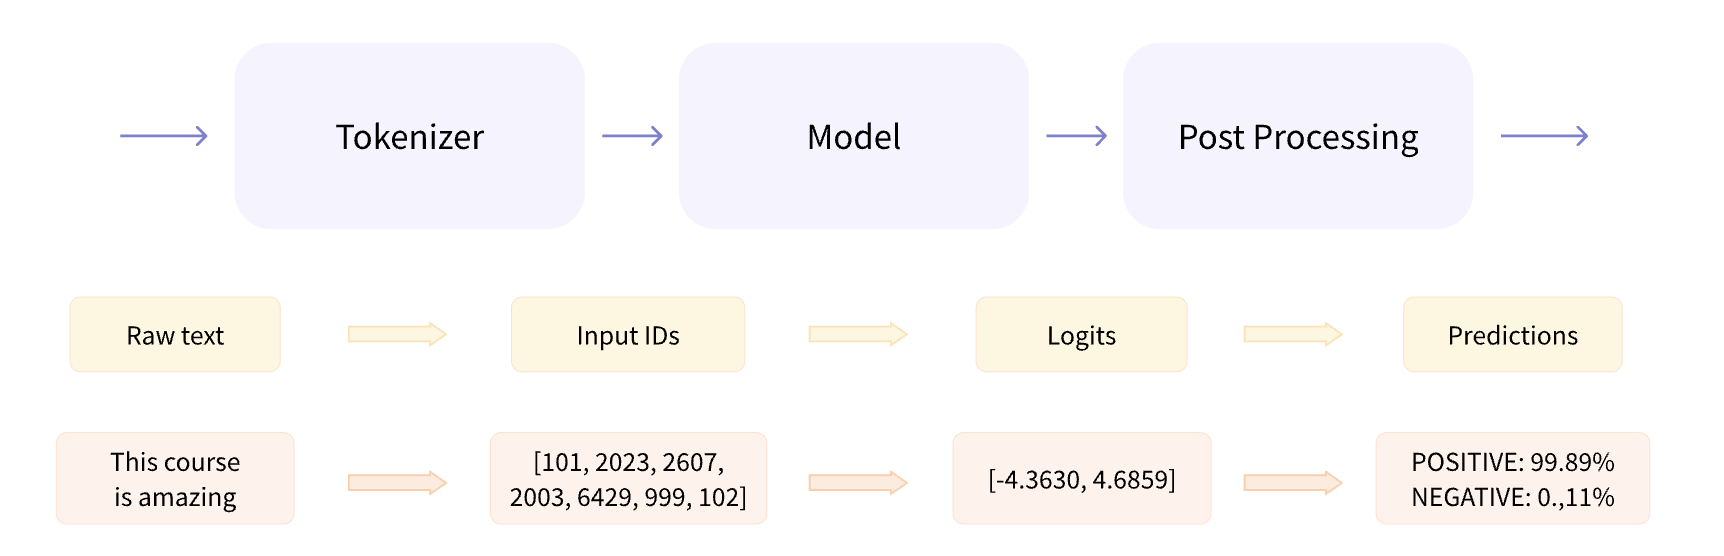

### Tokenizer

#### 단어 기반 토큰화 (Word-based Tokenization)
- 가장 먼저 생각할 수 있는 토큰화(tokenization) 형태는 단어기반 (word-based) 입니다.
- 일반적으로 몇 가지 규칙만 가지고도 설정 및 사용이 매우 쉽고, 종종 괜찮은 결과를 얻을 수 있습니다.

예를 들어, 아래 그림에서의 토큰화 과정은 원시 텍스트를 단어로 나누고 각각에 대한 숫자 표현을 찾는 것입니다:

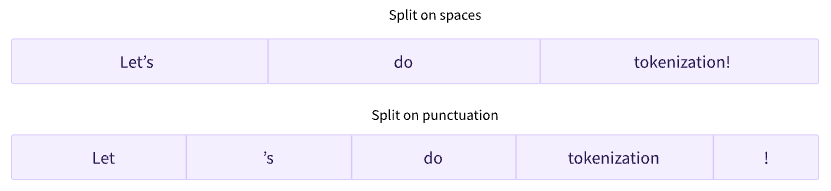

In [ ]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


단어기반 토크나이저로 특정 언어를 완전히 커버하려면, 해당 언어의 모든 단어에 대한 식별자가 필요하고, 이는 엄청난 양의 토큰을 생성합니다.
- 예를 들어, 영어에는 500,000개 이상의 단어가 있으므로 개별 단어에 대한 input ID(입력 식별자)로의 매핑을 구성하기 위해서 그만큼의 식별자들을 감당해야 합니다.
- 게다가, "dog"와 같은 단어는 "dogs"와 같은 단어와 다르게 표현되며, 모델은 처음에는 "dog"와 "dogs"가 유사한 단어들인지 파악하기 어렵습니다.
- 따라서, 두 단어를 관련이 없는 것으로 인식합니다. 이는 "run"과 "running"과 같은 다른 유사한 단어들도 마찬가지 입니다.

마지막으로, 어휘집(vocabulary)에 없는 단어를 표현하기 위해 사용자 정의 토큰이 필요합니다.
- 이는 "unknown" 토큰으로 알려져 있으며, 종종 "[UNK]" 또는 ""로 표시됩니다.
- 토크나이저가 이러한 "unknown" 토큰을 많이 생성한다는 것은 토크나이저가 해당 단어의 합당한 표현(sensible representation)을 찾을 수 없고, 그 과정에서 정보를 잃어버린다는 뜻이므로 나쁜 징조입니다.
- 어휘집(vocabulary)을 만들 때, 토크나이저가 이러한 "unknown" 토큰들을 최대한 적게 출력하게끔 하는 것이 목표가 되어야 합니다.

#### 토크나이저 로딩 및 저장
- 토크나이저를 로드하고 저장하는 것은 모델의 경우처럼 간단합니다.
- 실제로, 모델을 로드하고 저장할 때와 같이, `from_pretrained()` 및 `save_pretrained()` 메서드(method)를 그대로 사용합니다.
- 이들 메서드(method)들은 토크나이저(모델의 아키텍처와 약간 비슷함)와 어휘집(vocabulary, 모델의 가중치(weights)와 비슷함)에서 사용하는 알고리즘을 로드하거나 저장합니다.

`AutoModel` 클래스와 유사하게 `AutoTokenizer` 클래스는 라이브러리에서 체크포인트 이름에 해당하는 토크나이저 클래스를 가져옵니다. 라이브러리 내의 다른 모든 체크포인트와 함께 직접 사용할 수 있습니다.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

토크나이저를 저장하는 것은 모델을 저장하는 것과 동일합니다.

In [ ]:
tokenizer.save_pretrained("saving_folder")

('saving_folder/tokenizer_config.json',
 'saving_folder/special_tokens_map.json',
 'saving_folder/vocab.txt',
 'saving_folder/added_tokens.json',
 'saving_folder/tokenizer.json')

#### 인코딩 (Encoding)
- 텍스트를 숫자로 변환하는(translating text to numbers) 과정을 인코딩(encoding) 이라고 합니다.
- 인코딩(encoding)은 토큰화와 입력 식별자(input IDs)로의 변환이라는 2단계 프로세스로 수행됩니다.
  - 토큰화 프로세스는 토크나이저의 `tokenize()` 메서드에 의해 수행됩니다.
  - 각 토큰들의 입력 식별자(input IDs)로의 변환은 `convert_tokens_to_ids()` 메서드에 의해 처리됩니다.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"

# 토큰화
tokens = tokenizer.tokenize(sequence)
print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [ ]:
# 입력 식별자
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


#### 디코딩 (Decoding)
- 디코딩(decoding)은 반대 방향으로 진행됩니다. 변환된 입력 식별자(input IDs)를 이용해서 어휘집(vocabulary)에서 해당 문자열을 찾습니다. 이것은 다음과 같이 `decode()` 메서드를 사용하여 수행할 수 있습니다.

In [ ]:
decoded_string = tokenizer.decode(ids)

print(decoded_string)

Using a Transformer network is simple


### Model
- 이 섹션에서는 모델을 생성하고 사용하는 방법을 자세히 살펴보겠습니다. 이를 위해, 우리는 지정된 체크포인트(checkpoint)를 바탕으로 모델을 인스턴스화할 때 편리한 `AutoModel` 클래스를 사용할 것입니다.
- `AutoModel` 클래스와 이와 관련된 모든 항목들은 실제로 라이브러리에서 사용할 수 있는 다양한 모델에 대한 단순한 래퍼(wrapper)입니다. 당신이 선택한 체크포인트(checkpoint)에 적합한 모델 아키텍처(model architecture)를 자동으로 추측한 다음 이 아키텍처로 모델을 인스턴스화할 수 있으므로 영리한 래퍼(wrapper)라고 볼 수 있습니다.

#### 트랜스포머 모델 생성하기
- 해당모델은 학습을 하지 않은 상태이다.
- 즉, 사용을 하기 위해서는 충분한 학습을 한 후에 사용을 해야 한다.

In [ ]:
from transformers import AutoConfig, AutoModel

# bert-base-cased 모델을 불러오는 경우
config = AutoConfig.from_pretrained("bert-base-cased")
model = AutoModel.from_config(config)

- 이 설정(configuration) 객체에는 모델을 빌드하는데 필요한 많은 속성이 포함되어 있습니다:
  - `hidden_size` 속성은 hidden_states 벡터의 크기를 정의하고
  - `num_hidden_layers` 는 Transformer 모델의 계층(layers) 수를 정의합니다.

In [ ]:
config

BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

#### 모델 생성하기

- Tokenizer

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


- Model

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Transformer 모듈의 벡터 출력은 일반적으로 규모가 큽니다. 일반적으로 세 가지 차원이 있습니다:
- `배치 크기(Batch size)`: 한 번에 처리되는 시퀀스(sequence)의 개수(위의 예제에서는 2개).
- `시퀀스 길이(Sequence length)`: 시퀀스 숫자 표현의 길이(이 예에서는 16).
- `은닉 크기(Hidden size)`: 각 모델 입력의 벡터 차원.

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


이번에 사용한 예시에서는 시퀀스 분류 헤드(sequence classification head)가 포함되어 있는 모델이 필요합니다(문장을 긍정 또는 부정으로 분류하기 위해서).

따라서 실제로 AutoModel 클래스를 사용하지 않고 대신 `AutoModelForSequenceClassification`를 사용합니다.

In [ ]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

두 개의 문장과 두 개의 레이블만 있기 때문에, 모델에서 얻은 결과의 모양(shape)은 2 x 2입니다.

In [ ]:
print(outputs.logits.shape)

torch.Size([2, 2])


### Post Processing

In [ ]:
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


- 모델 추론(inference)

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

이제 모델이 아래 내용을 예측했다는 결론을 내릴 수 있습니다:
- `첫번째 문장` : NEGATIVE: 0.0402, POSITIVE: 0.9598
- `두번째 문장` : NEGATIVE: 0.9995, POSITIVE: 0.0005

## [사용가능한 파이프라인](https://fallenangel13th.tistory.com/16)

### `feature-extraction`
- 특징 추출 (텍스트에 대한 벡터 표현 추출)

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("feature-extraction")
result = pipe("hello")
print(result)
```

In [ ]:
from transformers import pipeline
import numpy as np

pipe = pipeline(task="feature-extraction")
result = pipe("hello")

No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
result

[[[0.3386610746383667,
   0.20652881264686584,
   0.13104639947414398,
   -0.23268352448940277,
   -0.3112504184246063,
   -0.08519081771373749,
   0.21013884246349335,
   -0.059714797884225845,
   0.011692345142364502,
   -1.2519692182540894,
   -0.28962746262550354,
   0.23159219324588776,
   -0.11384620517492294,
   -0.015073816291987896,
   -0.6100555658340454,
   0.24313029646873474,
   -0.059187132865190506,
   0.045462872833013535,
   -0.2847249507904053,
   -0.16145066916942596,
   0.15224015712738037,
   -0.31097403168678284,
   0.5090535283088684,
   -0.21209755539894104,
   0.29451900720596313,
   0.07385792583227158,
   0.28260862827301025,
   0.2442590296268463,
   -0.21124495565891266,
   0.318707674741745,
   0.15378494560718536,
   0.28575924038887024,
   0.06554687768220901,
   0.01698913984000683,
   -0.2352922111749649,
   -0.09367673844099045,
   0.02054392173886299,
   -0.22744186222553253,
   -0.09034925699234009,
   -0.18488790094852448,
   -0.4803803861141205,
 

### [fill-mask](https://huggingface.co/docs/transformers/tasks/masked_language_modeling)
- 마스크 채우기

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("fill-mask")
result = pipe("A Man is <mask>", top_k=3) #top_k는 가장 확률이 높은 3개 출력
print(result)


[{'score': 0.11967816203832626,
  'token': 23632,
  'token_str': ' Missing',
  'sequence': 'A Man is Missing'},
 {'score': 0.10868901759386063,
  'token': 8912,
  'token_str': ' Born',
  'sequence': 'A Man is Born'},
 {'score': 0.05237989127635956,
  'token': 9088,
  'token_str': ' Dead',
  'sequence': 'A Man is Dead'}]

```

In [ ]:
text = "The Milky Way is a <mask> galaxy."

In [ ]:
from transformers import pipeline

mask_filler = pipeline(task="fill-mask", model="distilbert/distilroberta-base")
mask_filler(text, top_k=3) #top_k는 가장 확률이 높은 3개 출력

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.641337513923645,
  'token': 21300,
  'token_str': ' spiral',
  'sequence': 'The Milky Way is a spiral galaxy.'},
 {'score': 0.1550421416759491,
  'token': 30794,
  'token_str': ' dwarf',
  'sequence': 'The Milky Way is a dwarf galaxy.'},
 {'score': 0.03614895045757294,
  'token': 2232,
  'token_str': ' massive',
  'sequence': 'The Milky Way is a massive galaxy.'}]

### [ner](https://huggingface.co/docs/transformers/tasks/token_classification)
- 개체명 인식(NER, Named Entity Recognition)은 입력 텍스트에서 어느 부분이 사람, 위치 또는 조직과 같은 개체명에 해당하는지 식별하는 작업
- 파이프라인 생성 함수에서 `grouped_entities=True` → 파이프라인이 동일한 엔티티에 해당하는 문장의 부분(토큰 혹은 단어)들을 그룹화하도록 함

```python
from transformers import pipeline
import numpy as np

pipe = pipeline("ner", grouped_entities=True) #grouped_entities=True 같은 개체 그룹화
result = pipe("Dokdo is a unique territory of Korea.")

#출력
print(result)
[{'entity_group': 'LOC',
  'score': 0.9633191,
  'word': 'Dokdo',
  'start': 0,
  'end': 5},
 {'entity_group': 'LOC',
  'score': 0.9983676,
  'word': 'Korea',
  'start': 31,
  'end': 36}]
```

In [ ]:
text = "The Golden State Warriors are an American professional basketball team based in San Francisco."


In [ ]:
from transformers import pipeline

classifier = pipeline(task="ner", model="distilbert/distilbert-base-uncased"
                    , grouped_entities=True) #grouped_entities=True 같은 개체 그룹화
classifier(text)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'LABEL_0',
  'score': 0.5941985,
  'word': 'the golden',
  'start': 0,
  'end': 10},
 {'entity_group': 'LABEL_1',
  'score': 0.5840651,
  'word': 'state',
  'start': 11,
  'end': 16},
 {'entity_group': 'LABEL_0',
  'score': 0.56495255,
  'word': 'warriors are an',
  'start': 17,
  'end': 32},
 {'entity_group': 'LABEL_1',
  'score': 0.5266109,
  'word': 'american',
  'start': 33,
  'end': 41},
 {'entity_group': 'LABEL_0',
  'score': 0.5490618,
  'word': 'professional basketball team based in',
  'start': 42,
  'end': 79},
 {'entity_group': 'LABEL_1',
  'score': 0.5380127,
  'word': 'san',
  'start': 80,
  'end': 83},
 {'entity_group': 'LABEL_0',
  'score': 0.5466826,
  'word': 'francisco.',
  'start': 84,
  'end': 94}]

### [question-answering](https://huggingface.co/docs/transformers/tasks/question_answering)
- 질의 응답

```python
from transformers import pipeline

result = pipeline("question-answering", model="klue/roberta-base") #모델명은 허깅페이스에서 검색하여 제목 그대로 사용
result(
    question="베토벤이 태어난 곳은 어디인가요?",
    context="루트비히 판 베토벤은 독일의 서양 고전 음악 작곡가이자 피아니스트이다. 독일의 본에서 태어났으며, 성인이 된 이후 거의 오스트리아 빈에서 살았다. 감기와 폐렴의 합병증으로 투병하다가 57세로 세상을 떠난 그는 고전주의와 낭만주의의 전환기에 활동한 주요 음악가이며, 종종 영웅적인 인물로도 묘사된다. 음악의 성인 즉 악성이라는 별칭으로도 불린다.."
)

#출력
{'score': 0.00026570854242891073,
 'start': 40,
 'end': 53,
 'answer': '독일의 본에서 태어났으며'}
```

In [ ]:
from transformers import pipeline

result = pipeline(task="question-answering", model="klue/roberta-base") #모델명은 허깅페이스에서 검색하여 제목 그대로 사용
result(
    question="베토벤이 태어난 곳은 어디인가요?",
    context="루트비히 판 베토벤은 독일의 서양 고전 음악 작곡가이자 피아니스트이다. 독일의 본에서 태어났으며, 성인이 된 이후 거의 오스트리아 빈에서 살았다. 감기와 폐렴의 합병증으로 투병하다가 57세로 세상을 떠난 그는 고전주의와 낭만주의의 전환기에 활동한 주요 음악가이며, 종종 영웅적인 인물로도 묘사된다. 음악의 성인 즉 악성이라는 별칭으로도 불린다.."
)

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.0002357695047976449,
 'start': 138,
 'end': 166,
 'answer': '주요 음악가이며, 종종 영웅적인 인물로도 묘사된다.'}

### [sentiment-analysis](https://huggingface.co/docs/transformers/tasks/sequence_classification#inference)
- 감정 분석

```python
from transformers import pipeline

pipe = pipeline("sentiment-analysis")
pipe(['I am King in the world'])

#출력
[{'label': 'POSITIVE', 'score': 0.999794065952301}]
```

In [ ]:
text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."


In [ ]:
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis", model="distilbert/distilbert-base-uncased")
classifier(text)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.5709776878356934}]

### [summarization](https://huggingface.co/docs/transformers/tasks/summarization)
- 요약

```python
from transformers import pipeline

pipe = pipeline("summarization")
pipe( """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
""")

#출력
[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. does . Rapidly developing economies such as China continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]
```

In [ ]:
text = """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""

In [ ]:
from transformers import pipeline

summarizer = pipeline(task="summarization", model="google-t5/t5-small")
summarizer(text)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': 'the number of graduates in traditional engineering disciplines has declined . in most of the premier american universities engineering curricula now concentrate on and encourage largely the study of engineering science . rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

### [text-generation](https://huggingface.co/docs/transformers/tasks/language_modeling)
- 텍스트 생성

```python
from transformers import pipeline

pipe = pipeline("text-generation", model="skt/kogpt2-base-v2", max_length=30)
pipe("나는 오늘 저녁에 밥을 먹고")

#출력
[{'generated_text': '나는 오늘 저녁에 밥을 먹고\n어디로 가는지부터 고민의 연속이다.\n그렇다면 나흘 동안 어디를 가고 그리고 어디로 가야 할까요?\n'}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline(task="text-generation", model="skt/kogpt2-base-v2", max_length=30)
pipe("나는 오늘 저녁에 밥을 먹고")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': '나는 오늘 저녁에 밥을 먹고 오늘은 그냥 저녁 먹고 출근할 때입니다.\n그날 밤 10시에 일어나서 아침운동을 하고\n아침에 일어나는 시간을 좀'}]

### [translation](https://huggingface.co/docs/transformers/tasks/translation#inference)
- 번역

```python
from transformers import pipeline

pipe = pipeline("translation", model="circulus/kobart-trans-ko-en-v2")
pipe("오늘 점심으로 스테이크를 먹었습니다.")

#출력
[{'translation_text': 'I had steak for lunch today'}]
```

In [ ]:
from transformers import pipeline

pipe = pipeline(task="translation", model="circulus/kobart-trans-ko-en-v2")
pipe("오늘 점심으로 스테이크를 먹었습니다.")

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/304 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'translation_text': 'I had steak for lunch today'}]

### `zero-shot-classification`
- 제로샷 분류

```python
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="hyunwoongko/kobart")
classifier(
    "개구리는 양서류이다.",
    candidate_labels=["교육", "정치", "사업"],
)

#출력
{'sequence': '개구리는 양서류이다.',
 'labels': ['사업', '정치', '교육'],
 'scores': [0.38976219296455383, 0.3134584426879883, 0.2967793345451355]}
```

In [ ]:
from transformers import pipeline

classifier = pipeline(task="zero-shot-classification", model="hyunwoongko/kobart")
classifier(
    "개구리는 양서류이다.",
    candidate_labels=["교육", "정치", "사업"],
)

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/496M [00:00<?, ?B/s]

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at hyunwoongko/kobart and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/109 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': '개구리는 양서류이다.',
 'labels': ['교육', '사업', '정치'],
 'scores': [0.35756751894950867, 0.32197585701942444, 0.3204565942287445]}